Basic visualization of the dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
TRAIN_DATA_PATH = "/content/drive/My Drive/cs189 practicum/cs189 code/pollutionTrain.csv"
TEST_DATA_PATH = "/content/drive/My Drive/cs189 practicum/cs189 code/pollutionTest.csv"

### DATA SETUP

In [3]:
trainPD = pd.read_csv(TRAIN_DATA_PATH)
testPD = pd.read_csv(TEST_DATA_PATH)

trainPD = trainPD.fillna(0)
testPD = testPD.fillna(0)

In [4]:
label_cols = ['target']

# relevant features chosen based on 1) data context and 
# 2) the SequentialFeatureSelector in regression.ipynb. 
feature_cols = [
                'precipitable_water_entire_atmosphere',
                'relative_humidity_2m_above_ground',
                'temperature_2m_above_ground',
                'u_component_of_wind_10m_above_ground',
                'v_component_of_wind_10m_above_ground',
                'L3_NO2_NO2_column_number_density',
                'L3_NO2_NO2_slant_column_number_density',
                'L3_NO2_absorbing_aerosol_index',
                'L3_NO2_tropopause_pressure',
                'L3_O3_O3_column_number_density',
                'L3_CO_CO_column_number_density',
                'L3_CO_cloud_height',
                'L3_CO_H2O_column_number_density',
                'L3_HCHO_tropospheric_HCHO_column_number_density',
                'L3_SO2_SO2_column_number_density',
]

In [5]:
# partition features matrix and target matrix 
X = trainPD[feature_cols]
y = trainPD[label_cols]

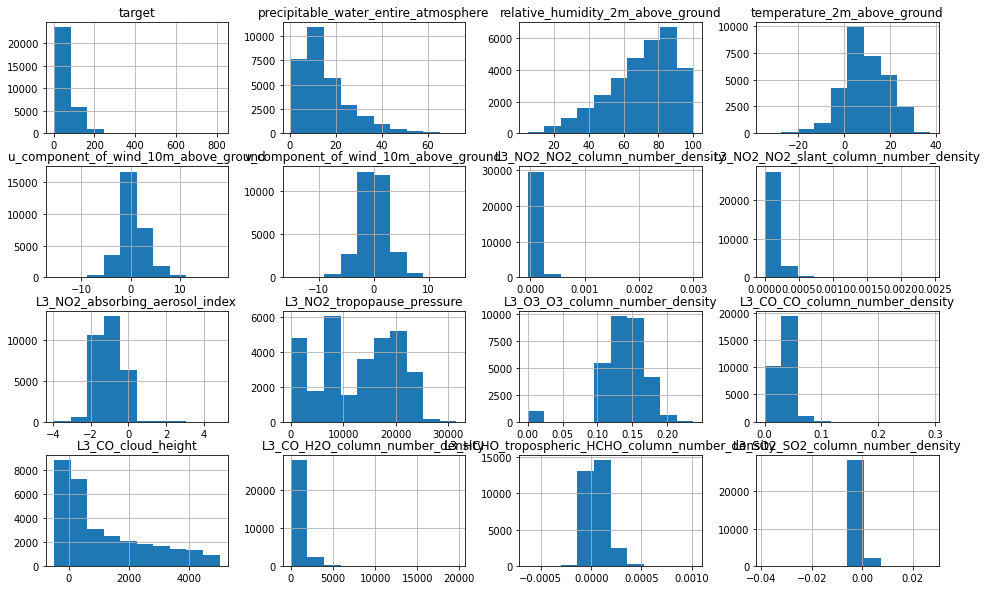

In [ ]:
# view histogramm of data
pd.concat([y, X], axis=1).hist(figsize=(16, 10));
plt.show()

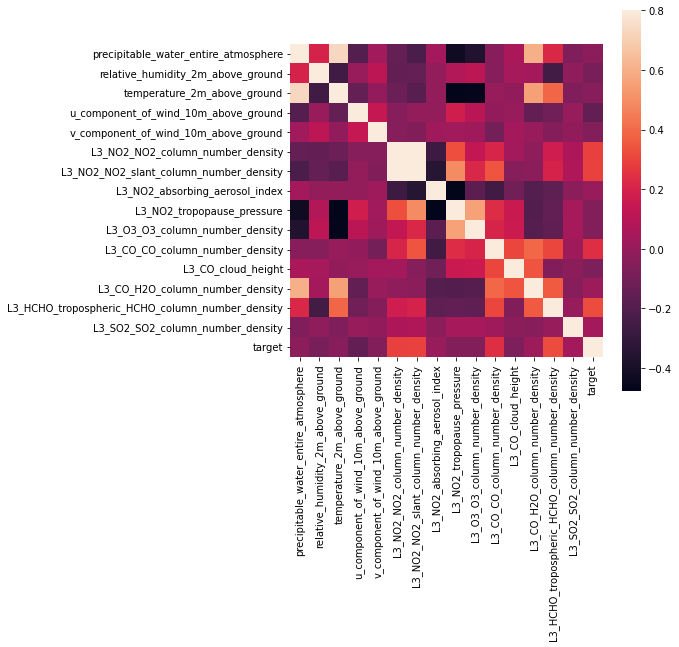

In [ ]:
# view correlations between features
correlation_matrix = pd.concat([X, y], axis=1).corr()
fig = plt.figure(figsize=(7,7));
sb.heatmap(correlation_matrix, square=True, vmax=0.8)
plt.show()

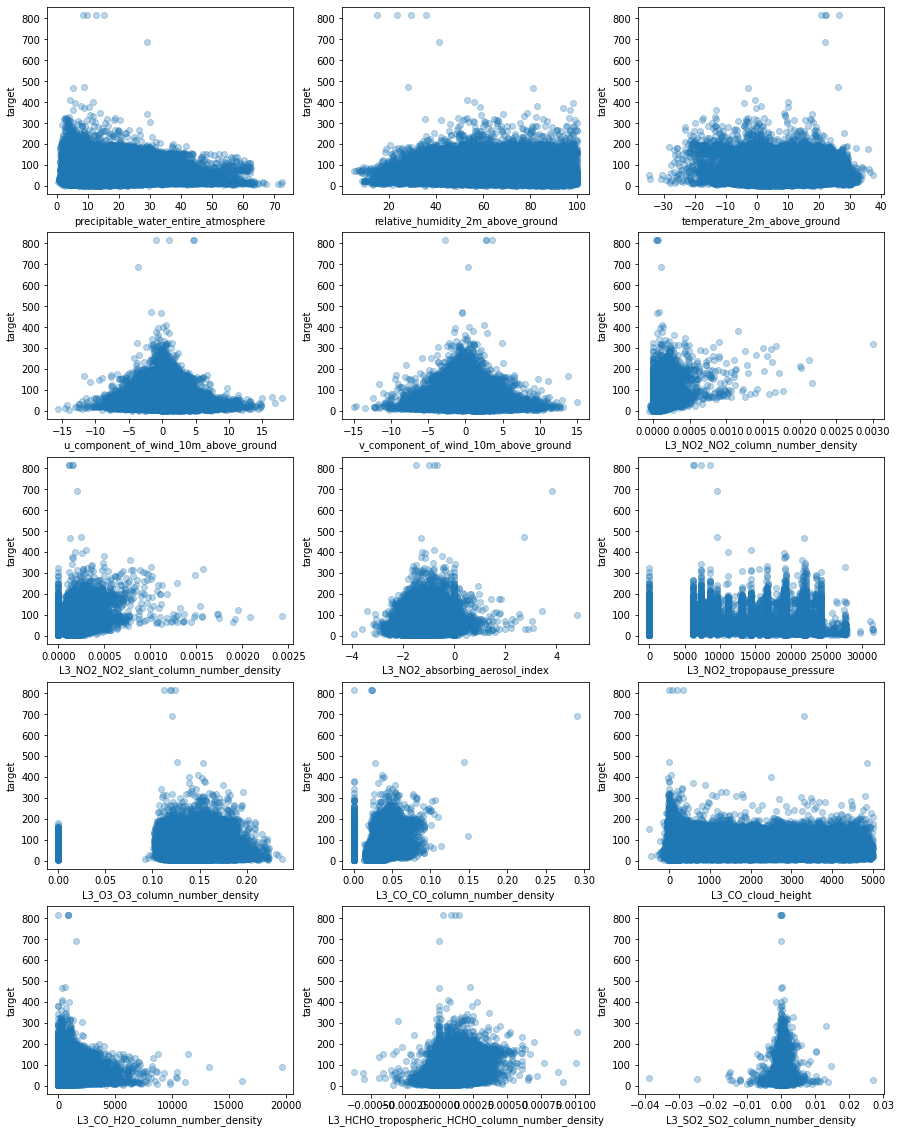

In [ ]:
# view scatter plot of features against target
fig = plt.figure(figsize=(15, 20))

for i in range(X.shape[1]):
  ax = fig.add_subplot(5, 3, i+1)
  p = ax.scatter(X.iloc[:, i], y['target'], alpha=0.3);

  ax.set_xlabel(list(X)[i])
  ax.set_ylabel('target')


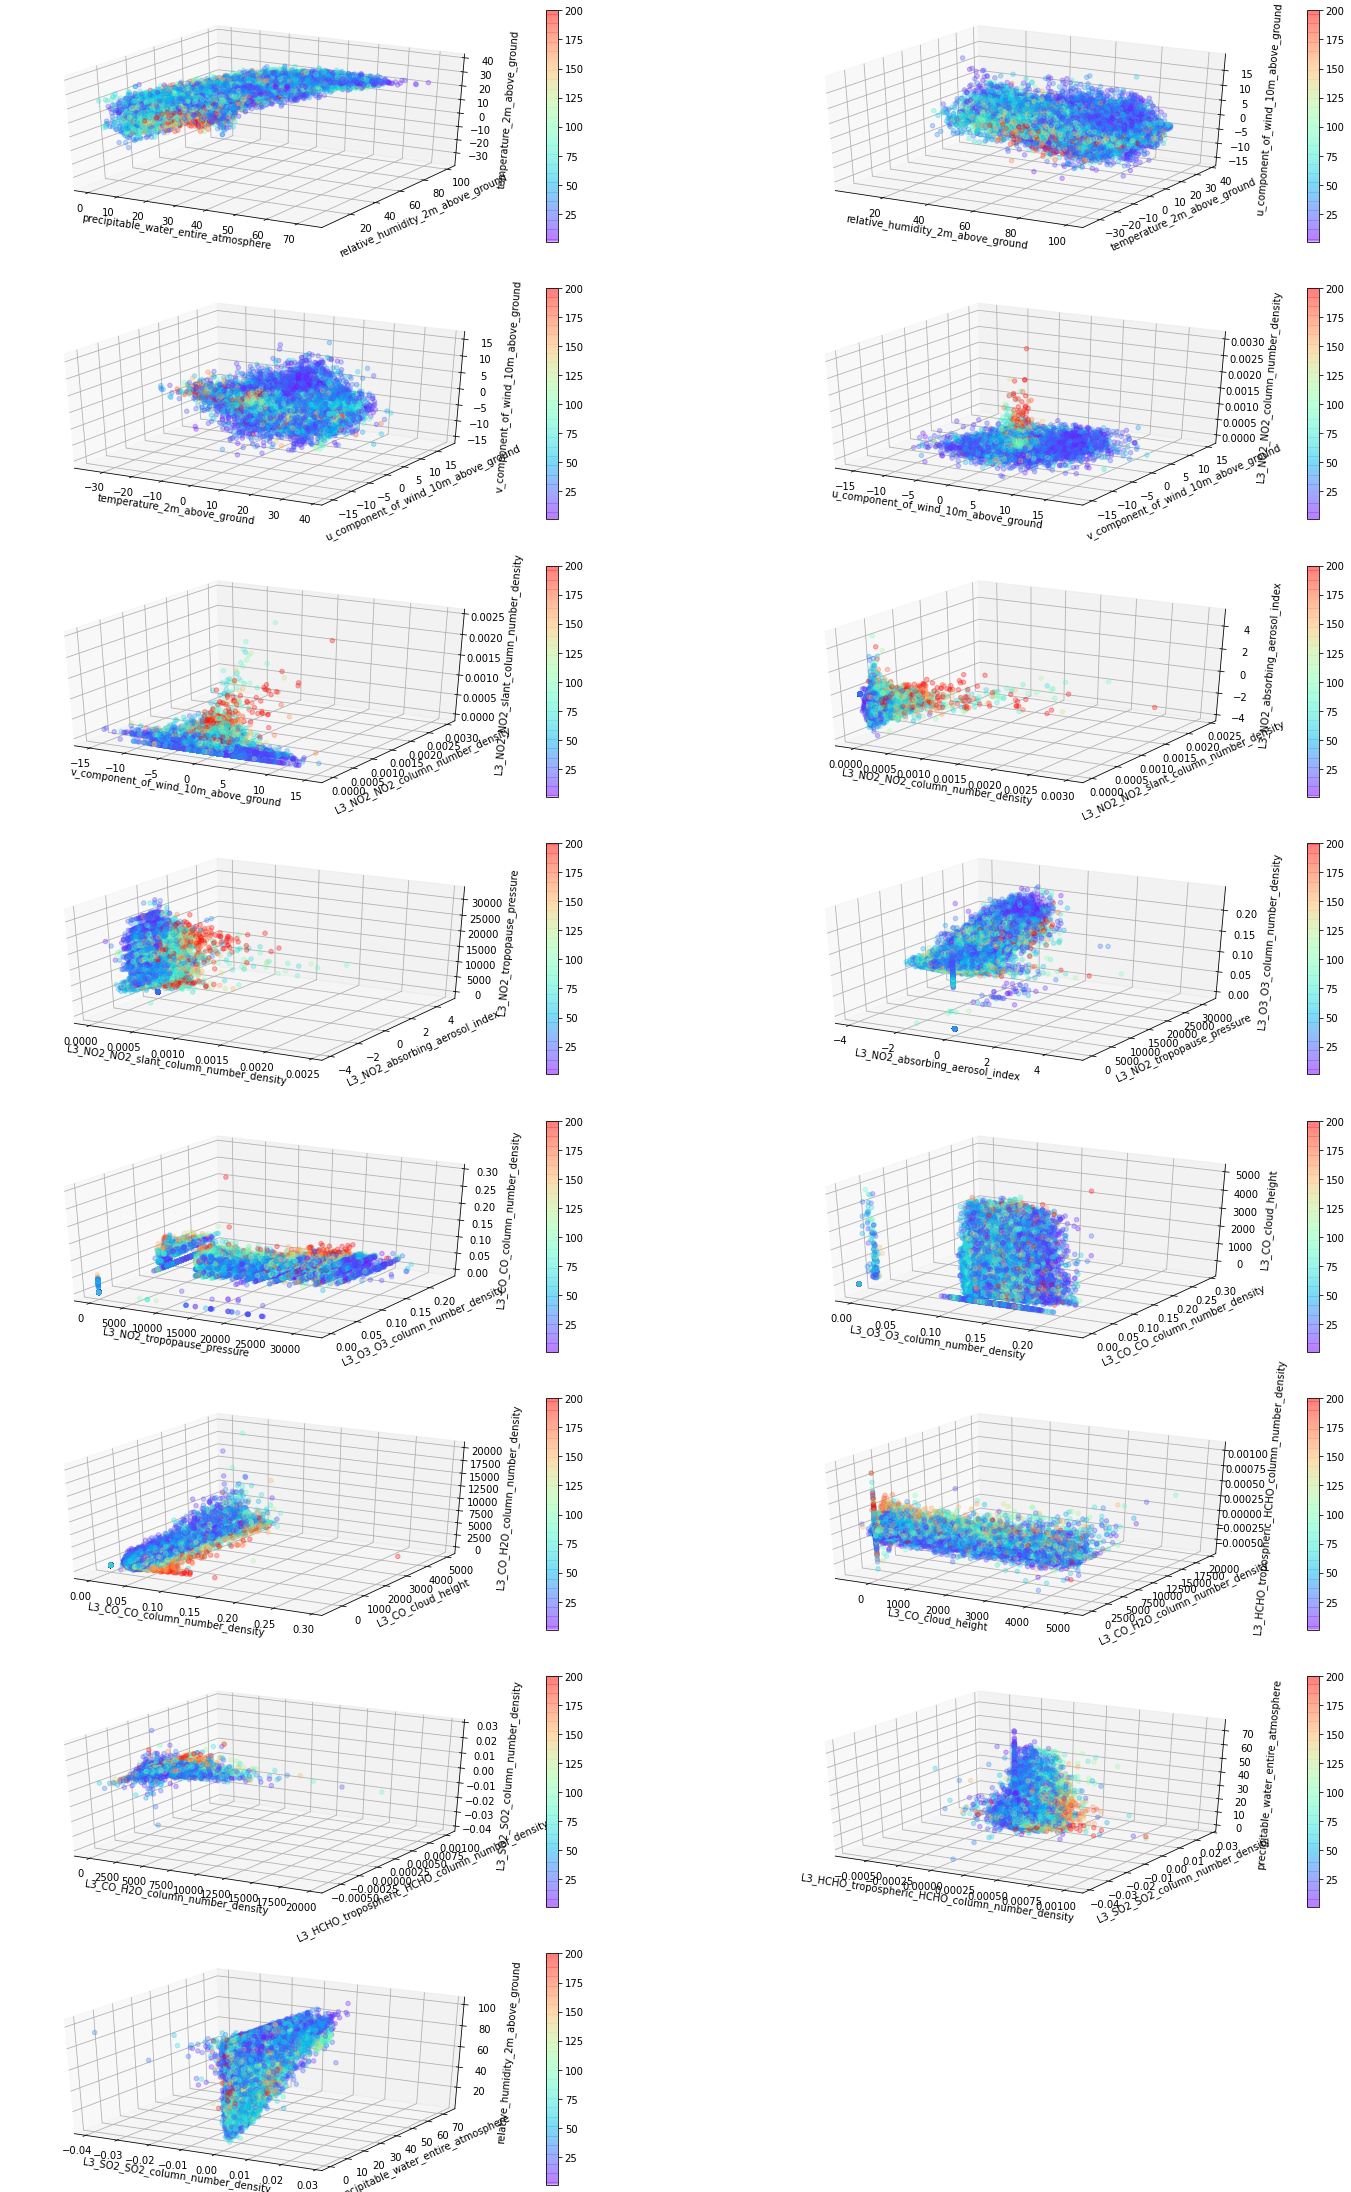

In [8]:
# visualize features of data

fig = plt.figure(figsize=(25, 40))

for i in range(15):
  # plt_idx = i
  ax = fig.add_subplot(8, 2, i+1, projection='3d')

  x_idx = i % 15
  y_idx = (i + 1) % 15
  z_idx = (i + 2) % 15

  xdata = X.iloc[:, x_idx]
  ydata = X.iloc[:, y_idx]
  zdata = X.iloc[:, z_idx]
  c=y['target']
  cmap_adjusted = plt.cm.get_cmap('rainbow')

  # note: the actual range for 'target' is from 10 to the 800s, but highly 
  # left-skewed - from the histogram, it looks like ~70% of the data is <90.
  # Thus, we set vmax=200 for better visualization/distinction between smaller
  # values.
  p = ax.scatter3D(xdata, ydata, zdata, c=c, alpha=0.3, vmax=200, 
              cmap=plt.cm.get_cmap('rainbow'));

  ax.set_xlabel(X.columns[x_idx])
  ax.set_ylabel(X.columns[y_idx])
  ax.set_zlabel(X.columns[z_idx])
  fig.colorbar(p);